# 02: Training of the AI Model
In industrial applications as well as in Kaggle Competitions the model XGBoost is a high performing example of an AI model. Therefore, we try to implement it for the prediction of the Yield Strength based on the chemical composition of steel.

## Imports and used Python packages

In [26]:
from data.dataloader import TensileStrengthMeasurements
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd

## Preparation of the Dataset for Machine Learning

In [4]:
dataset_cleaned = TensileStrengthMeasurements()
dataset_cleaned.load(parquet_filename='steel_strength_cleaned.parquet.gzip')
dataset_df_cleaned = dataset_cleaned.get_dataset_as_dataframe()
X = dataset_df_cleaned[dataset_cleaned.feature_names]
y = dataset_df_cleaned['yield_strength']

In [6]:
dataset_df_cleaned.head(5)

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield_strength,tensile_strength,elongation
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
5,Fe0.636C0.00881Mn0.000203Si0.00972Cr0.135Ni0.0...,0.19,0.02,0.49,12.56,0.94,1.96,0.01,0.00,0.01,20.10,0.00,0.03,0.00,1328.3,1779.5,19.7
7,Fe0.646C0.00479Mn0.00597Si0.00492Cr0.135Ni0.00...,0.10,0.57,0.24,12.19,0.01,8.90,0.01,0.02,0.01,15.20,0.00,0.03,0.00,1228.9,1795.6,2.0
8,Fe0.648C0.000453Mn0.0000991Si0.0386Cr0.183Ni0....,0.01,0.01,1.99,17.50,2.10,0.02,0.01,0.00,0.01,11.80,0.00,0.03,0.05,1088.6,1419.3,10.0


## Train-Test-Split
Beeing able to validate the performance of the trained AI model it is important to separate some of the data examples of the dataset for testing. In this example we are using 15% of the data for validation.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(f'Using {len(y_train)} out of {len(dataset_df_cleaned)} examples for training')
print(f'Using {len(y_test)} out of {len(dataset_df_cleaned)} examples for testing')
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

Using 252 out of 297 examples for training
Using 45 out of 297 examples for testing


## XGBoost
For further information on XGBoost, please visit the [documentation](https://xgboost.readthedocs.io/en/stable/) of the project.

### Simple Training

In [22]:
param = {'max_depth': 4, 'eta': 0.3, 'objective': 'reg:squarederror', 
        'eval_metric': ['rmse', 'mae', 'auc']}
evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 20
xgb_model_simple = xgb.train(param, dtrain, num_round, evallist)

[20:52:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[20:52:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[0]	train-rmse:993.99984	train-mae:969.93142	train-auc:nan	eval-rmse:951.99728	eval-mae:930.48988	eval-auc:nan
[20:52:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[20:52:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[1]	train-rmse:711.45728	train-mae:684.10832	train-auc:nan	eval-rmse:671.40537	eval-mae:645.05320	eval-auc:nan
[20:52:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_16790

[20:52:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[20:52:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[18]	train-rmse:62.20501	train-mae:46.24080	train-auc:nan	eval-rmse:113.18392	eval-mae:85.98644	eval-auc:nan
[20:52:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[20:52:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[19]	train-rmse:60.84996	train-mae:44.84813	train-auc:nan	eval-rmse:113.32823	eval-mae:85.96391	eval-auc:nan


/Users/tobiasbettinger/opt/anaconda3/envs/matprop/lib/python3.10/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


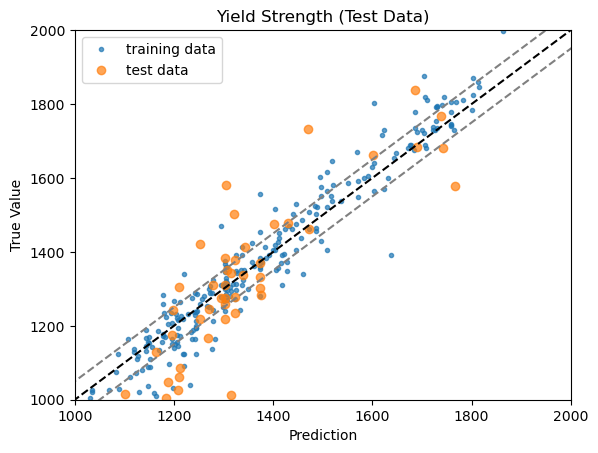

In [24]:
plt.plot(xgb_model_simple.predict(dtrain), y_train, '.', alpha=.7, label='training data')
plt.plot(xgb_model_simple.predict(dtest), y_test, 'o', alpha=.7, label='test data')
plt.plot([0, 2800], [0, 2800], 'k--')
plt.plot([0, 2800], [50, 2850], '--', color='gray')
plt.plot([0, 2800], [-50, 2750], '--', color='gray')
plt.xlim([1000, 2000])
plt.ylim([1000, 2000])
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title('Yield Strength (Test Data)')
plt.legend()

### Grid Search for Hyper Parameter Tuning
With the grid search method, it is possible to determine a local optimum of a parameter set with respect to the model performance. We are using some of the hyper parameters to be varied by the Grid Search Engine.

In [19]:
param = {'max_depth': [2, 4, 6], 'n_estimators': [20, 100, 200],
         'eta': [0.3, 0.8, 1.0], 
         'objective': ['reg:squarederror', 'reg:pseudohubererror'], 
         'eval_metric': ['rmse', 'mae', 'auc']}
evallist = [(dtrain, 'train'), (dtest, 'eval')]

xgb_regressor = xgb.XGBRegressor()
grid_search = GridSearchCV(xgb_regressor, param)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'eta': [0.3, 0.8, 1.0],
                         'eval_metric': ['rmse', 'mae', 'auc'],
                         'max_depth': [2, 4, 6], 'n_estimators': [20, 100, 200],
                         'objective': ['reg:squarederror',
                                       'reg:pseudohubererror']})

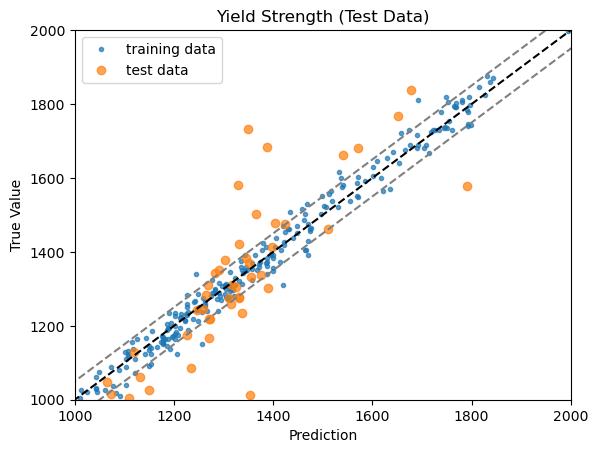

In [21]:
plt.plot(grid_search.best_estimator_.predict(X_train), y_train, '.', alpha=.7, label='training data')
plt.plot(grid_search.best_estimator_.predict(X_test), y_test, 'o', alpha=.7, label='test data')
plt.plot([0, 2800], [0, 2800], 'k--')
plt.plot([0, 2800], [50, 2850], '--', color='gray')
plt.plot([0, 2800], [-50, 2750], '--', color='gray')
plt.xlim([1000, 2000])
plt.ylim([1000, 2000])
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title('Yield Strength (Test Data)')
plt.legend()

### Comparison of the Simple and the GridSearch Model

Text(0.5, 0, 'Ground Truth - Prediction')

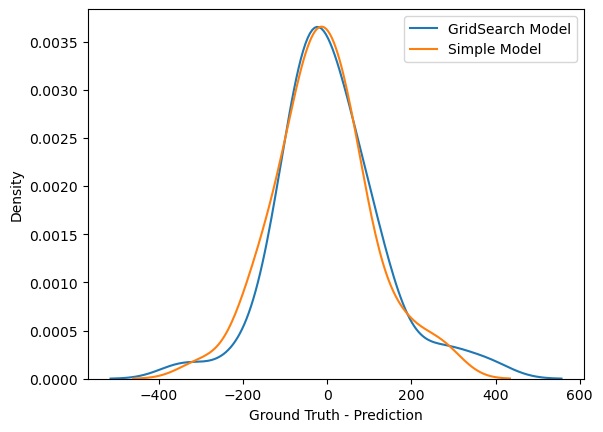

In [34]:
fig, ax = plt.subplots()
sns.kdeplot(y_test - grid_search.best_estimator_.predict(X_test), ax=ax, label='GridSearch Model')
sns.kdeplot(y_test - xgb_model_simple.predict(dtest), ax=ax, label='Simple Model')
ax.legend()
ax.set_xlabel('Ground Truth - Prediction')

We can observe, that the GridSearch has improved the prediction results, but only a tiny bit. One possible explanation for errors up to 10% is the small size of the training dataset. Thus, the model does not have enough variation in the feature space, in order to predict the Yield Strength more precicely. 

### Saving the optimized model

In [39]:
best_xgb_model = grid_search.best_estimator_.save_model('model/xgb_best_model')

# Model Explainability
There are many techniques and scientific approaches that can be used to explain the decision of AI models. One very popular package is [Shap](https://shap.readthedocs.io/en/latest/).

In [42]:
import shap
from model.modelloader import XGBModel

In [43]:
xgb_matprop = XGBModel('model/xgb_best_model')

In [44]:
explainer = shap.TreeExplainer(xgb_matprop.model)
shap_values = explainer(X)

The impact of each feature can be visualized with shap using the following beeswarm plot.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


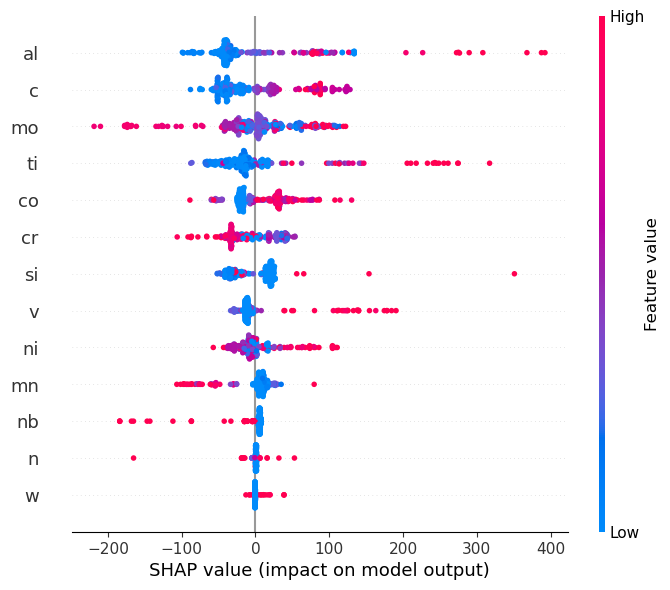

In [45]:
shap.plots.beeswarm(shap_values, max_display=20)